In [178]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from matplotlib.pyplot import figure
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [179]:
inc_ex = pd.read_csv('Income-Expenditure Dataset/Inc_Exp_Data_augmented.csv')

inc_ex['income_ex_ratio'] = inc_ex['Emi_or_Rent_Amt'] / inc_ex['Mthly_HH_Income']


inc_ex.head()

,Mthly_HH_Income,Emi_or_Rent_Amt,income_ex_ratio
0,5000.0,2000.0,0.400000
1,6000.0,3000.0,0.500000
2,12500.0,3000.0,0.240000
3,18000.0,8000.0,0.444444
4,20000.0,8000.0,0.400000


In [180]:
inc_ex.shape

(119, 3)

Text(0, 0.5, 'EMI')

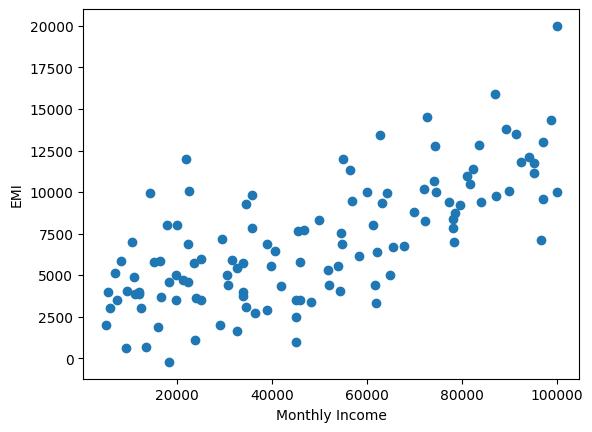

In [181]:
plt.scatter(inc_ex['Mthly_HH_Income'], inc_ex['Emi_or_Rent_Amt'])
plt.xlabel('Monthly Income')
plt.ylabel('EMI')

In [182]:
X = np.array(inc_ex['Mthly_HH_Income']).reshape(-1, 1)
y = np.array(inc_ex['Emi_or_Rent_Amt'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
income_ex_model = Ridge(alpha=2.0, random_state=42, tol=0.0001)
income_ex_model.fit(X_train, y_train)

print("Train error :", mean_absolute_error(y_train, income_ex_model.predict(X_train)))
print("Test error :", mean_absolute_error(y_test, income_ex_model.predict(X_test)))

Train error : 1940.5678282935214
Test error : 2572.594268055753


Text(0, 0.5, 'EMI')

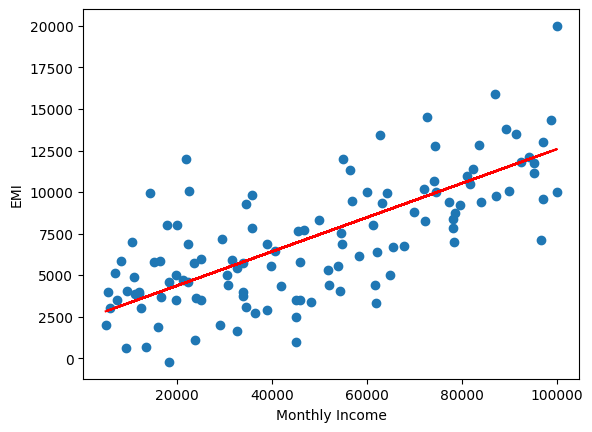

In [183]:
income_ex_model.coef_
income_ex_model.intercept_

plt.plot(inc_ex['Mthly_HH_Income'], income_ex_model.predict(np.array(inc_ex['Mthly_HH_Income']).reshape((-1, 1))), color='red')


plt.scatter(inc_ex['Mthly_HH_Income'], inc_ex['Emi_or_Rent_Amt'])
plt.xlabel('Monthly Income')
plt.ylabel('EMI')

In [184]:
personal_expenses = pd.read_csv('Personal Finance/personal_transactions.csv')
personal_expenses['Date'] = pd.to_datetime(personal_expenses['Date'])
personal_expenses.head()

,Date,Description,Amount,Transaction Type,Category,Account Name
0,2018-01-01,Amazon,11.11,debit,Shopping,Platinum Card
1,2018-01-02,Mortgage Payment,1247.44,debit,Mortgage & Rent,Checking
2,2018-01-02,Thai Restaurant,24.22,debit,Restaurants,Silver Card
3,2018-01-03,Credit Card Payment,2298.09,credit,Credit Card Payment,Platinum Card
4,2018-01-04,Netflix,11.76,debit,Movies & DVDs,Platinum Card


In [185]:
personal_expenses['Month'] = None
for i in range(len(personal_expenses['Date'])):
    date = personal_expenses.loc[i, 'Date']
    month = f'{date.month}_{date.year}'
    personal_expenses.loc[i, 'Month'] = month

months = {i :  personal_expenses[personal_expenses['Month'] == i] for i in personal_expenses['Month'].unique()}
len(months)

21

In [186]:
monthly_expenses = {}
for i in months:
    month_name = i.split("_")[0]
    if month_name in monthly_expenses:
        monthly_expenses[month_name].append(months[i]['Amount'].sum())
    else:
        monthly_expenses[month_name] = [months[i]['Amount'].sum()]

for i in monthly_expenses:
    monthly_expenses[i] = np.mean(monthly_expenses[i])

monthly_expenses

{'1': 10025.545,
 '2': 8024.6050000000005,
 '3': 10927.71,
 '4': 11978.93,
 '5': 13249.050000000001,
 '6': 13098.51,
 '7': 8712.89,
 '8': 10672.8,
 '9': 10528.59,
 '10': 7870.58,
 '11': 8982.61,
 '12': 9063.09}

Text(0, 0.5, 'Expenditure')

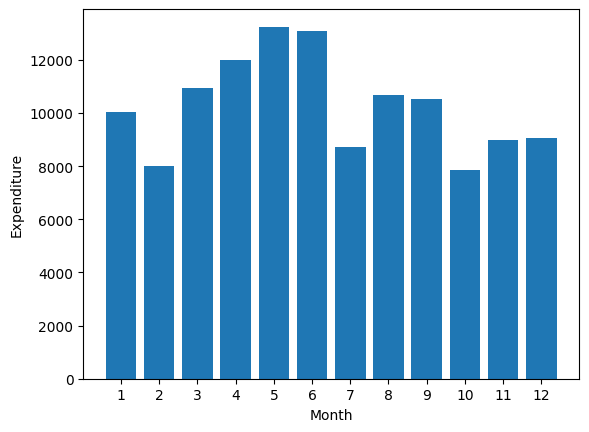

In [187]:
month_names = monthly_expenses.keys()
spends = monthly_expenses.values()

plt.bar(month_names, spends)
plt.xlabel('Month')
plt.ylabel('Expenditure')

In [188]:
monthly_credit = {}
monthly_debit = {}
for i in months:
    month_name = i
    if month_name in monthly_expenses:
        df = months[i]
        credit = df[df['Transaction Type'] == 'credit']
        monthly_credit[month_name].append(credit['Amount'].sum())

        debit = df[df['Transaction Type'] == 'debit']
        monthly_debit[month_name].append(debit['Amount'].sum())
    else:
        df = months[i]
        credit = df[df['Transaction Type'] == 'credit']
        monthly_credit[month_name] = [credit['Amount'].sum()]

        debit = df[df['Transaction Type'] == 'debit']
        monthly_debit[month_name] = [debit['Amount'].sum()]

for i in monthly_debit:
    monthly_debit[i] = np.mean(monthly_debit[i])
    monthly_credit[i] = np.mean(monthly_credit[i])

monthly_debit

{'1_2018': 2931.45,
 '2_2018': 3165.05,
 '3_2018': 3500.16,
 '4_2018': 6029.540000000002,
 '5_2018': 11392.030000000002,
 '6_2018': 3665.88,
 '7_2018': 2968.98,
 '8_2018': 2396.18,
 '9_2018': 3286.99,
 '10_2018': 2848.35,
 '11_2018': 2963.65,
 '12_2018': 3427.99,
 '1_2019': 5187.3099999999995,
 '2_2019': 3163.4000000000005,
 '3_2019': 3241.51,
 '4_2019': 4829.549999999999,
 '5_2019': 4673.51,
 '6_2019': 11999.599999999999,
 '7_2019': 4148.0599999999995,
 '8_2019': 4266.17,
 '9_2019': 5998.42}

<Figure size 1280x480 with 0 Axes>

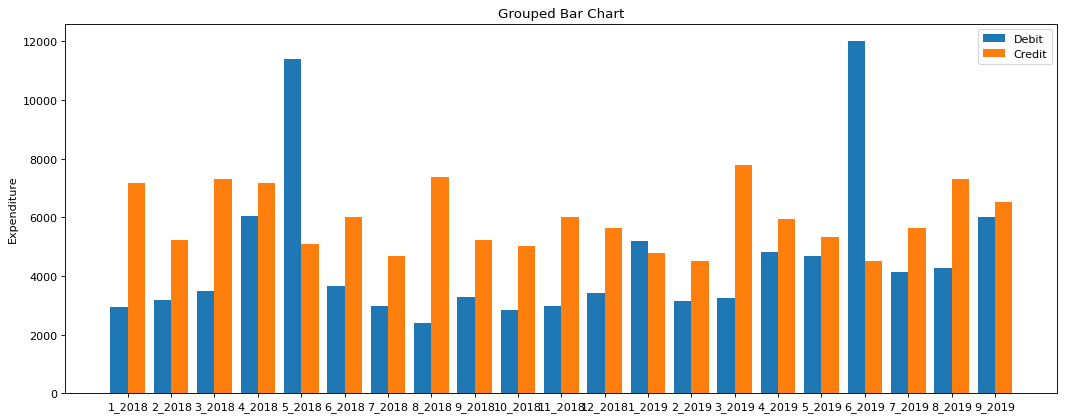

In [189]:
figure(figsize=(16, 6), dpi=80)

month_names = monthly_debit.keys()
debit_spends = monthly_debit.values()
credit_spends = monthly_credit.values()

w, x = 0.4, np.arange(len(month_names))

fig, ax = plt.subplots(figsize=(16, 6), dpi=80)
ax.bar(x - w/2, debit_spends, width=w, label='Debit')
ax.bar(x + w/2, credit_spends, width=w, label='Credit')


ax.set_xticks(x)
ax.set_xticklabels(month_names)
ax.set_ylabel('Expenditure')
ax.set_title('Grouped Bar Chart')
ax.legend()

plt.show()

In [190]:
wealth_mange_data = pd.read_csv('Wealth Management Customer Data/Bank_Customers.csv')

wealth_mange_data.head()

,RowNumber,CustomerID,Surname,CreditScore,Country,Gender,Married,Age,Dependents,NumBankAccts,...,LifeInsurance,NumTransactions,LastTransactionDate,LastTransactionAmt,ForeignAssets,NumProducts,Churn,Discount,Retention,CLV
0,1.0,15634602.0,Hargrave,619.0,France,Female,1.0,42.0,3.0,1.0,...,1.0,5.0,1/27/2019,2095.3,0.39,4.0,0.0,0.21,NaN,NaN
1,2.0,15647311.0,Hill,608.0,Spain,Female,1.0,41.0,2.0,1.0,...,1.0,8.0,2/25/2019,9955.2,0.21,1.0,0.0,0.50,NaN,NaN
2,3.0,15619304.0,Onio,502.0,France,Female,1.0,42.0,2.0,3.0,...,0.0,3.0,11/5/2017,9123.1,0.00,5.0,1.0,0.37,NaN,NaN
3,4.0,15701354.0,Boni,699.0,France,Female,1.0,39.0,0.0,2.0,...,0.0,5.0,1/7/2019,5973.3,0.40,5.0,0.0,0.72,NaN,NaN
4,5.0,15737888.0,Mitchell,850.0,Spain,Female,1.0,43.0,0.0,1.0,...,1.0,2.0,3/28/2015,9834.4,0.13,4.0,0.0,0.26,NaN,NaN


In [191]:
wealth_mange_data['GenderInt'] = 1
wealth_mange_data.loc[wealth_mange_data.Gender == 'Female', 'GenderInt'] = 0

In [192]:
reg_inputs = ['CreditScore', 'Age', 'Dependents', 'NumBankAccts', 'EstimatedSalary',
              'Risk Profile', 'Debt', 'Net Assets', 'Revenue', 'ForeignAssets']

multi_cat_inputs = ['Country']

bin_cat_inputs = ['GenderInt', 'Married', 'HasCrCard', 'Mortgage', 'BusinessOwner',
              'LifeInsurance']

investment_categories = ['EmergingMarketFund', 'RealEstate', 'PrivateEquity',
                         'GovtBonds', 'CorpBonds', 'ETF Tech', 'ETF Health', 'ETF Med']

final_preds = ['Portfolio Return', 'Diversification']

input_info = reg_inputs + multi_cat_inputs + bin_cat_inputs

df = wealth_mange_data[input_info + investment_categories + final_preds]

In [193]:
imputed_values = {}

for col in reg_inputs:
    df[col] = df[col].astype(float)
    df[col] = df[col].fillna(df[col].mean())
    imputed_values[col] = df[col].mean()

for col in bin_cat_inputs:
    print(col)
    df[col] = df[col].fillna(0)
    imputed_values[col] = df[col].mean()

for col in multi_cat_inputs:
    df[col] = df[col].astype(str)
    df[col] = df[col].fillna(df[col].mode().iloc[0])
    imputed_values[col] = df[col].mode().iloc[0]

def encode_labels(labels):
    lab_enc = LabelEncoder()
    onh_enc = OneHotEncoder()
    labels = lab_enc.fit_transform(labels).reshape(-1, 1)
    x = onh_enc.fit_transform(labels).toarray()

    return x, lab_enc, onh_enc

label_encs = {}
onh_encs = {}
one_hot_X = None

x, lab_enc, onh_enc = encode_labels(df[multi_cat_inputs[0]])

one_hot_X = np.array(x).reshape((len(x), -1))

for label in multi_cat_inputs:
    x, lab_enc, onh_enc = encode_labels(df[label])
    one_hot_X = np.hstack((one_hot_X, x))
    label_encs[label] = lab_enc
    onh_encs[label] = onh_enc

reg_data = df[reg_inputs].to_numpy()
bin_data = df[bin_cat_inputs].to_numpy()
X_features = np.hstack((reg_data, bin_data, one_hot_X))

X_features.shape

GenderInt
Married
HasCrCard
Mortgage
BusinessOwner
LifeInsurance


/var/folders/0z/_v9xgymx5f78g4k66q1gqvxw0000gn/T/ipykernel_2539/579576040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(float)
/var/folders/0z/_v9xgymx5f78g4k66q1gqvxw0000gn/T/ipykernel_2539/579576040.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].fillna(df[col].mean())
/var/folders/0z/_v9xgymx5f78g4k66q1gqvxw0000gn/T/ipykernel_2539/579576040.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

(10001, 24)

In [197]:
for investment in investment_categories:
    y = df[investment]
    X = X_features[y.notna()]
    y = y[y.notna()]
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model_params = {
                "model": LogisticRegression(random_state=42, max_iter=1000),
                "params": {"C": [0.1, 1, 10, 100], "solver": ["lbfgs", "saga"]},
                "const": LogisticRegression
            }

    grid_search = GridSearchCV(estimator=model_params["model"],
                            param_grid=model_params["params"],
                            scoring="accuracy", cv=5,
                            n_jobs=-1)
    grid_search.fit(X_train, y_train)
    #best_model = grid_search.best_estimator_
    best_model = model_params["const"](**grid_search.best_params_)
    best_model.fit(X_train, y_train)

    y_pred = best_model.predict(X_train)

    # Metrics
    accuracy = accuracy_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred, average='weighted')
    precision = precision_score(y_train, y_pred, average='weighted')
    recall = recall_score(y_train, y_pred, average='weighted')

    # Print current model results
    print(f"\n{investment} Train Results:")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

    y_pred = best_model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    # Print current model results
    print(f"\n{investment} Test Results:")
    print(f"Best Params: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"F1 Score: {f1:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")

/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


EmergingMarketFund Train Results:
Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.52
F1 Score: 0.52
Precision: 0.52
Recall: 0.52

EmergingMarketFund Test Results:
Best Params: {'C': 0.1, 'solver': 'lbfgs'}
Accuracy: 0.51
F1 Score: 0.51
Precision: 0.51
Recall: 0.51


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


RealEstate Train Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.50
F1 Score: 0.49
Precision: 0.50
Recall: 0.50

RealEstate Test Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.50
F1 Score: 0.49
Precision: 0.50
Recall: 0.50


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


PrivateEquity Train Results:
Best Params: {'C': 100, 'solver': 'lbfgs'}
Accuracy: 0.51
F1 Score: 0.51
Precision: 0.51
Recall: 0.51

PrivateEquity Test Results:
Best Params: {'C': 100, 'solver': 'lbfgs'}
Accuracy: 0.49
F1 Score: 0.48
Precision: 0.49
Recall: 0.49


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


GovtBonds Train Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.50
F1 Score: 0.45
Precision: 0.50
Recall: 0.50

GovtBonds Test Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.50
F1 Score: 0.44
Precision: 0.52
Recall: 0.50


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


CorpBonds Train Results:
Best Params: {'C': 100, 'solver': 'lbfgs'}
Accuracy: 0.52
F1 Score: 0.52
Precision: 0.52
Recall: 0.52

CorpBonds Test Results:
Best Params: {'C': 100, 'solver': 'lbfgs'}
Accuracy: 0.49
F1 Score: 0.49
Precision: 0.49
Recall: 0.49


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


ETF Tech Train Results:
Best Params: {'C': 10, 'solver': 'lbfgs'}
Accuracy: 0.52
F1 Score: 0.49
Precision: 0.52
Recall: 0.52

ETF Tech Test Results:
Best Params: {'C': 10, 'solver': 'lbfgs'}
Accuracy: 0.48
F1 Score: 0.46
Precision: 0.48
Recall: 0.48


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


ETF Health Train Results:
Best Params: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.51
F1 Score: 0.51
Precision: 0.51
Recall: 0.51

ETF Health Test Results:
Best Params: {'C': 1, 'solver': 'lbfgs'}
Accuracy: 0.50
F1 Score: 0.50
Precision: 0.50
Recall: 0.50


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:/


ETF Med Train Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.52
F1 Score: 0.42
Precision: 0.52
Recall: 0.52

ETF Med Test Results:
Best Params: {'C': 0.1, 'solver': 'saga'}
Accuracy: 0.51
F1 Score: 0.41
Precision: 0.46
Recall: 0.51


/Users/apple/.pyenv/versions/3.10.14/envs/audio_class/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
